In [5]:
from IPython.display import Image
from IPython.display import display

# Python

In [1]:
# Basic math operation

13 * 2

26

In [ ]:
# Store a variable and call it

name = "Zein"

In [ ]:
name

In [2]:
# function (define a function add then call it)

def addition(a,b) :

    return a + b


In [3]:
addition(12, 5)

17

# KNN Recommender

👉 K-Nearest-Neighbors (KNN) models can be used to model and make predictions, but they can alternatively be utilized to find the closest points in a dataset.  

👨🏻‍🏫 In this workshop, we will use a KNN model to create a basic music recommender system.

In [6]:
image_url = "https://miro.medium.com/v2/resize:fit:1100/format:webp/1*HmuYl9VQX9pzCL4KLmILrg.png"

display(Image(url=image_url))

## Calculates Distances between data points

### Represent data (every column becomes a dimension)

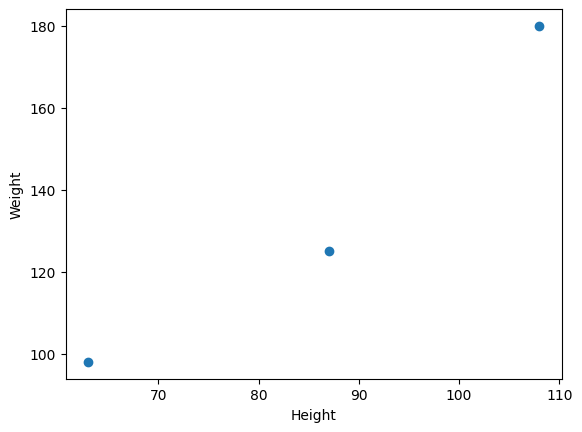

In [7]:
import numpy as np
import matplotlib.pyplot as plt

cows_weight = [125, 98, 180]

cows_height = [87, 63, 108]

plt.scatter(cows_height, cows_weight)

plt.xlabel('Height')
plt.ylabel('Weight');

In [8]:
image2_url= 'https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/formula-of-euclidean-distance-1624039148.png'

display(Image(url=image2_url))

In [10]:
# import the data
import pandas as pd

data = pd.read_csv('spotify.csv')
data

,Unnamed: 0,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
0,0,We're For The Dark - Remastered 2010,['Badfinger'],22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674
1,1,Sixty Years On - Piano Demo,['Elton John'],25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783
2,2,Got to Find Another Way,['The Guess Who'],21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341
3,3,Feelin' Alright - Live At The Fillmore East/1970,['Joe Cocker'],22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005
4,4,Caravan - Take 7,['Van Morrison'],23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,China,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",72,0.786,0.608,0.808,0,7,0.0822,-3.702,0.0881,105.029
9996,9996,Halloweenie III: Seven Days,['Ashnikko'],68,0.717,0.734,0.753,0,7,0.1010,-6.020,0.0605,137.936
9997,9997,AYA,['MAMAMOO'],76,0.634,0.637,0.858,0,4,0.2580,-2.226,0.0809,91.688
9998,9998,Darkness,['Eminem'],70,0.671,0.195,0.623,1,2,0.6430,-7.161,0.3080,75.055


In [11]:
# Table sahpe

data.shape

(10000, 13)

In [12]:
# info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10000 non-null  int64  
 1   name          10000 non-null  object 
 2   artists       10000 non-null  object 
 3   popularity    10000 non-null  int64  
 4   danceability  10000 non-null  float64
 5   valence       10000 non-null  float64
 6   energy        10000 non-null  float64
 7   explicit      10000 non-null  int64  
 8   key           10000 non-null  int64  
 9   liveness      10000 non-null  float64
 10  loudness      10000 non-null  float64
 11  speechiness   10000 non-null  float64
 12  tempo         10000 non-null  float64
dtypes: float64(7), int64(4), object(2)
memory usage: 1015.8+ KB


🎯 Let's find songs that are "similar" to Queen's mythical *Another One Bites the Dust*.

In [13]:
queen_song = data.iloc[4295 : 4296] # Another One Bites the Dust - Queen

queen_song

,Unnamed: 0,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
4295,4295,Another One Bites The Dust - Live at Wembley '86,['Queen'],29,0.534,0.114,0.984,0,4,0.982,-5.058,0.297,115.991


## 1. Calculating the distances

In [ ]:
data.columns

In [14]:
# Create your X and y

# For your X, keep only numerical data. For y, you can choose whatever numerical column

X = data.drop(columns = ['Unnamed: 0', 'name', 'artists'])

y = data["tempo"]


In [20]:
X

,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
0,22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674
1,25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783
2,21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341
3,22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005
4,23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716
...,...,...,...,...,...,...,...,...,...,...
9995,72,0.786,0.608,0.808,0,7,0.0822,-3.702,0.0881,105.029
9996,68,0.717,0.734,0.753,0,7,0.1010,-6.020,0.0605,137.936
9997,76,0.634,0.637,0.858,0,4,0.2580,-2.226,0.0809,91.688
9998,70,0.671,0.195,0.623,1,2,0.6430,-7.161,0.3080,75.055


In [16]:
# Take a look at the statistics of X (min, max, median,...)

X.describe()

,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,37.556800,0.549507,0.523148,0.592609,0.103200,5.20560,0.209787,-9.822324,0.081426,120.179723
std,12.559743,0.178097,0.261456,0.251808,0.304235,3.56205,0.193693,5.321064,0.100472,30.260748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-60.000000,0.000000,0.000000
25%,27.000000,0.430000,0.313000,0.414000,0.000000,2.00000,0.093900,-12.347250,0.034200,96.191250
50%,36.000000,0.557000,0.524500,0.616000,0.000000,5.00000,0.129000,-8.762000,0.045100,118.330500
75%,46.000000,0.681000,0.742000,0.801000,0.000000,9.00000,0.261250,-6.070750,0.077400,139.609500
max,86.000000,0.986000,0.996000,1.000000,1.000000,11.00000,1.000000,1.073000,0.957000,224.437000


### Scaling

- MinMaxScaler est une technique de mise à l'échelle des caractéristiques utilisée en apprentissage automatique pour mettre à l'échelle les caractéristiques numériques dans une plage spécifique

In [17]:
url_image3='https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEh8ZpEd0FLjIxjwexj9rlrFSCkhCj0Rlmas_wMFFlo_fYaRXt2HfhCMnQELGzea4t48O8yTDMeFozA6c-L4mEd9hWtC1MzZCmN-qHMHrMn310bw1Zo7IYJc4yJ45F3G396_ydSfauUgAf4D9j-wAZO5bVT7IxtJgpgSlxl0ORK3zfJ6KdxGwwgRhA/s867/feature-scaling-in-machine-learning.png'
display(Image(url=url_image3))

# 0 -----> 100
# (0 - 0) / (100) ------------> 0
# (100 - 0) / (100) -----------> 1

In [21]:
# Scale your data (X) using MinMaxScaler  from sklearn to make sure all columns have similar scales
# minmax_scaler = (x_i - min) / (max - min)
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

X_scaled = minmax.fit_transform(X)
X_scaled

array([[0.25581395, 0.68762677, 0.56124498, ..., 0.77454849, 0.03490073,
        0.52430749],
       [0.29069767, 0.46247465, 0.26004016, ..., 0.80736168, 0.0292581 ,
        0.64063858],
       [0.24418605, 0.43914807, 0.83634538, ..., 0.82191803, 0.03949843,
        0.3757892 ],
       ...,
       [0.88372093, 0.64300203, 0.63955823, ..., 0.94598268, 0.08453501,
        0.40852444],
       [0.81395349, 0.68052738, 0.19578313, ..., 0.86517774, 0.32183908,
        0.33441456],
       [0.86046512, 0.86815416, 0.64457831, ..., 0.90174054, 0.11285266,
        0.42324127]])

In [22]:
X_scaled.min(axis =0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
# fit a KNNRegressor on your data
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn.fit(X_scaled, y)

KNeighborsRegressor()

In [24]:
# The Queen Song

queen_song

,Unnamed: 0,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
4295,4295,Another One Bites The Dust - Live at Wembley '86,['Queen'],29,0.534,0.114,0.984,0,4,0.982,-5.058,0.297,115.991


In [25]:
# Do the necessary transformations on queen_song to make it the same as any row in X

queen = queen_song.drop(columns = ['Unnamed: 0', 'name', 'artists'])

queen = minmax.transform(queen)

In [26]:
X_scaled[0]

array([0.25581395, 0.68762677, 0.56124498, 0.432     , 0.        ,
       0.27272727, 0.0727    , 0.77454849, 0.03490073, 0.52430749])

In [27]:
queen

array([[0.3372093 , 0.54158215, 0.11445783, 0.984     , 0.        ,
        0.36363636, 0.982     , 0.89961194, 0.31034483, 0.51680873]])

In [32]:
# Go to the documentaion of KNNRegressor and find the method that allows you to get a given number of neighbors for queen song
# Basically, we want to suggest 10 similar songs
# from sklearn.neighbors import NearestNeighbors


neighbors = knn.kneighbors(queen, n_neighbors= 11, return_distance=True)[1][0]
neighbors

array([4295, 1164, 1761, 8607,  704, 1211, 3307, 2233, 2705, 1614,  737])

## 3. Making a playlist!

👇 Make a playlist with 10 songs based on Queen's *Another One Bites the Dust*, sorted by increasing tempo.

In [33]:
# Look at the documentaion, understand the structure of the output of the method kneighbors, then use it to create a dataframe
# which contains 10 similar songs to the Queens one

In [34]:
data.iloc[neighbors]

,Unnamed: 0,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
4295,4295,Another One Bites The Dust - Live at Wembley '86,['Queen'],29,0.534,0.1140,0.984,0,4,0.982,-5.058,0.2970,115.991
1164,1164,"Hi, Hi, Hi - Live / Remastered",['Wings'],27,0.219,0.1620,0.939,0,4,0.993,-9.275,0.2260,140.832
1761,1761,Liar,['The Damned'],25,0.348,0.2030,0.939,0,4,0.838,-11.540,0.0745,107.064
8607,8607,Cheat Codes,['Nitro Fun'],51,0.626,0.1460,0.960,0,4,0.894,-4.234,0.0837,128.001
704,704,"It Ain't Me, Babe - Live at LA Forum, Inglewoo...",['Bob Dylan'],23,0.455,0.3080,0.981,0,7,0.995,-6.409,0.1830,100.490
1211,1211,A Light In The Black,['Rainbow'],32,0.334,0.0936,0.982,0,4,0.753,-10.190,0.0735,109.414
3307,3307,Graveyard,['Butthole Surfers'],27,0.504,0.1350,0.949,0,7,0.913,-8.797,0.0385,98.128
2233,2233,YYZ - Live In Canada / 1980,['Rush'],26,0.334,0.2780,0.911,0,4,0.937,-12.017,0.0642,145.905
2705,2705,A Sort Of Homecoming - Live,['U2'],22,0.505,0.3630,0.883,0,6,0.970,-6.794,0.0578,125.824
1614,1614,"Clock Strikes Ten - Live at Nippon Budokan, To...",['Cheap Trick'],21,0.332,0.2370,0.981,0,2,0.891,-8.838,0.1290,161.160


In [35]:
bob_marley = data.iloc[582 : 583]
bob_marley

,Unnamed: 0,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
582,582,"Get Up, Stand Up - Single Version",['Bob Marley & The Wailers'],30,0.742,0.882,0.676,0,5,0.0779,-7.126,0.339,80.328


In [36]:


bob_marley = bob_marley.drop(columns = ['Unnamed: 0', 'name', 'artists'])

bob_marley = minmax.transform(bob_marley)

In [37]:
bob_marley

array([[0.34883721, 0.7525355 , 0.88554217, 0.676     , 0.        ,
        0.45454545, 0.0779    , 0.86575082, 0.35423197, 0.3579089 ]])

In [38]:
bob_playlist = knn.kneighbors(bob_marley, n_neighbors= 100, return_distance=True)[1][0]

In [39]:
bob_playlist

array([ 582, 3121, 1149, 6780, 1137, 5586,  955, 5776, 4339, 7727, 5419,
       5249, 6906, 2120, 5352, 4547, 1177, 1557, 2368, 7570, 4382, 7034,
       3363, 4528,  875, 4978, 3992, 1967,   89, 1224, 2346, 6196, 7091,
       1991,  742, 5227,  528,  754, 3597,   66,  827, 1276, 5168, 5135,
       2126, 1600, 2864, 4175,  974, 2453, 4913, 4937,  367, 5260, 2090,
       5175, 3022, 2074, 6395, 2504, 3591, 3186, 4270,  653, 7846, 1122,
       7084, 6008, 4169,  566, 4018, 5446, 4111,  993, 6115, 3214,   68,
       3150, 1197, 1910, 5006,  735, 1085, 1013,  649, 5136,  315, 8521,
        784, 5080, 2827, 6978, 3858, 3223, 1345, 6367, 3961, 8295, 3187,
       7348])

In [40]:
data.iloc[bob_playlist]

,Unnamed: 0,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
582,582,"Get Up, Stand Up - Single Version",['Bob Marley & The Wailers'],30,0.742,0.882,0.676,0,5,0.0779,-7.126,0.3390,80.328
3121,3121,Is It Live,['Run–D.M.C.'],26,0.848,0.814,0.763,0,6,0.0867,-12.421,0.3010,96.682
1149,1149,Why Must I Cry,['Peter Tosh'],23,0.638,0.869,0.727,0,7,0.0821,-7.187,0.2530,80.496
6780,6780,Heartsprings,['Heiruspecs'],36,0.700,0.663,0.687,0,4,0.1050,-9.967,0.3030,94.075
1137,1137,Brand New Second Hand,['Peter Tosh'],25,0.719,0.815,0.627,0,7,0.1270,-11.436,0.2010,74.760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367,6367,It's Goin' Down (feat. Mike Shinoda & Mr. Hahn),"['X-Ecutioners', 'Mike Shinoda', 'Mr. Hahn']",35,0.674,0.900,0.890,0,8,0.0465,-3.953,0.2740,104.862
3961,3961,The Nigga Ya Love To Hate,['Ice Cube'],25,0.867,0.693,0.907,0,6,0.1820,-5.077,0.2900,109.829
8295,8295,Doggin Lover - Radio Version,['Gigi'],47,0.805,0.868,0.606,0,7,0.1650,-7.049,0.1280,104.992
3187,3187,Walk This Way (feat. Aerosmith),"['Run–D.M.C.', 'Aerosmith']",21,0.752,0.923,0.830,0,6,0.0691,-3.291,0.0550,105.793


# Let's create a playlist based on your favorite artist

In [ ]:
70

70 -----80